# Classify the Players
#### Apply K-means algorithm to coefficients from players' model to classify the players

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Read the coefficients of trained models

In [2]:
df = pd.read_csv('Players_Model.csv')
df.head()

,PLAYER_ID,PLAYER_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Tip Shot,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT
0,101107,Marvin Williams,-0.050940,0.003051,-0.066535,-0.006088,-0.215761,0.024269,0.410943,-0.005930,0.001587,0.040387,-0.203892
1,101108,Chris Paul,-0.014261,0.093813,-0.210874,-0.003555,-0.181095,-0.038015,0.523669,-0.102153,-0.018836,0.059462,0.052138
2,101123,Gerald Green,-0.030737,0.028338,-0.164765,-0.017007,-0.105280,-0.035262,0.368071,-0.064119,-0.061494,0.024802,-0.255253
3,101133,Ian Mahinmi,-0.055357,-0.007706,-0.262190,-0.058324,-0.282424,0.098670,0.427226,-0.044641,0.017269,0.034682,-0.552406
4,101139,CJ Miles,-0.056501,0.023340,0.022567,0.019859,-0.259440,0.101153,0.380645,0.036996,-0.072710,0.044115,-0.284945


Give more weight to feature "DIST", and less weight to "COMBINED_SHOT_TYPE_Dunk"

In [3]:
df['DIST'] = df['DIST'] * 2.0
df['COMBINED_SHOT_TYPE_Dunk'] = df['COMBINED_SHOT_TYPE_Dunk'] / 3.0
df.head()

,PLAYER_ID,PLAYER_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Tip Shot,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT
0,101107,Marvin Williams,-0.050940,0.003051,-0.133070,-0.006088,-0.215761,0.024269,0.136981,-0.005930,0.001587,0.040387,-0.203892
1,101108,Chris Paul,-0.014261,0.093813,-0.421748,-0.003555,-0.181095,-0.038015,0.174556,-0.102153,-0.018836,0.059462,0.052138
2,101123,Gerald Green,-0.030737,0.028338,-0.329530,-0.017007,-0.105280,-0.035262,0.122690,-0.064119,-0.061494,0.024802,-0.255253
3,101133,Ian Mahinmi,-0.055357,-0.007706,-0.524381,-0.058324,-0.282424,0.098670,0.142409,-0.044641,0.017269,0.034682,-0.552406
4,101139,CJ Miles,-0.056501,0.023340,0.045134,0.019859,-0.259440,0.101153,0.126882,0.036996,-0.072710,0.044115,-0.284945


Classify the players with K-Means

In [4]:
X = df.drop(['PLAYER_ID', 'PLAYER_NAME', 'INTERCEPT'], axis=1)
clf = KMeans(n_clusters=5)
clf.fit(X)
print(clf.cluster_centers_)

[[-0.00808159  0.0122234  -0.41430348  0.00460007 -0.15892979  0.00365834
   0.12619154 -0.01989484 -0.06045667  0.03751056]
 [ 0.03862307  0.03732582 -3.5984179  -0.00554898 -0.10703942 -0.07158493
   0.12446745 -0.0227393  -0.00769436  0.05393687]
 [-0.03390701  0.02273194  0.01976413  0.0106528  -0.26644704  0.08085486
   0.1492722  -0.01606944 -0.04387507  0.04405679]
 [-0.02447658  0.01453194 -2.16217217 -0.03812213 -0.03951833 -0.10607349
   0.10435118 -0.01605998 -0.02048471 -0.01394413]
 [-0.00804299  0.02692629 -0.93894509  0.01186857 -0.1051544  -0.07711352
   0.13806155 -0.00364362 -0.0657321   0.01911788]]


In [5]:
player_cluster = df.copy()
player_cluster['CLUSTER'] = clf.labels_

In [6]:
player_cluster.head()

,PLAYER_ID,PLAYER_NAME,PERIOD,REMAIN_TIME,DIST,ANGLE,COMBINED_SHOT_TYPE_Jump Shot,COMBINED_SHOT_TYPE_Layup,COMBINED_SHOT_TYPE_Dunk,COMBINED_SHOT_TYPE_Tip Shot,COMBINED_SHOT_TYPE_Hook Shot,COMBINED_SHOT_TYPE_Bank Shot,INTERCEPT,CLUSTER
0,101107,Marvin Williams,-0.050940,0.003051,-0.133070,-0.006088,-0.215761,0.024269,0.136981,-0.005930,0.001587,0.040387,-0.203892,2
1,101108,Chris Paul,-0.014261,0.093813,-0.421748,-0.003555,-0.181095,-0.038015,0.174556,-0.102153,-0.018836,0.059462,0.052138,0
2,101123,Gerald Green,-0.030737,0.028338,-0.329530,-0.017007,-0.105280,-0.035262,0.122690,-0.064119,-0.061494,0.024802,-0.255253,0
3,101133,Ian Mahinmi,-0.055357,-0.007706,-0.524381,-0.058324,-0.282424,0.098670,0.142409,-0.044641,0.017269,0.034682,-0.552406,0
4,101139,CJ Miles,-0.056501,0.023340,0.045134,0.019859,-0.259440,0.101153,0.126882,0.036996,-0.072710,0.044115,-0.284945,2


In [7]:
player_cluster.to_csv('Players_Cluster.csv', index=False)

View the cluster with location features

In [8]:
X_loc = df[['DIST', 'ANGLE']]
clf_loc = KMeans(n_clusters=5)
clf_loc.fit(X_loc)
print(clf_loc.cluster_centers_)

[[ 0.01612115  0.01053418]
 [-0.41914042  0.00459699]
 [-3.5984179  -0.00554898]
 [-0.93894509  0.01186857]
 [-2.16217217 -0.03812213]]


In [9]:
player_cluster_loc = df.copy()[['PLAYER_ID', 'PLAYER_NAME', 'DIST', 'ANGLE']]
player_cluster_loc['CLUSTER'] = clf.labels_
player_cluster_loc.head()

,PLAYER_ID,PLAYER_NAME,DIST,ANGLE,CLUSTER
0,101107,Marvin Williams,-0.133070,-0.006088,2
1,101108,Chris Paul,-0.421748,-0.003555,0
2,101123,Gerald Green,-0.329530,-0.017007,0
3,101133,Ian Mahinmi,-0.524381,-0.058324,0
4,101139,CJ Miles,0.045134,0.019859,2


In [10]:
player_cluster_loc.to_csv('Players_Cluster_loc.csv', index=False)

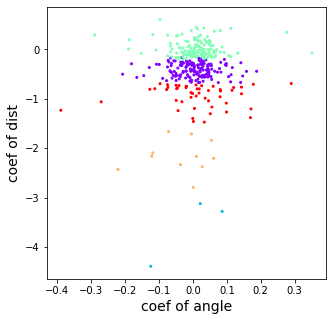

In [11]:
plt.figure(figsize=(5,5))
colors = np.array(player_cluster_loc['CLUSTER'])
plt.scatter(player_cluster_loc['ANGLE'], player_cluster_loc['DIST'], c=colors, s=4, alpha=1.0,
           cmap=plt.get_cmap('rainbow'))
plt.xlabel('coef of angle',fontsize=14)
plt.ylabel('coef of dist', fontsize=14)
plt.show()